# <center>Classification -- Predicting Customer Churn</center>

### <center>San Francisco</center>

# [1] Objective

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

# [2] Data Understanding
The data for this project is in a csv format. The following describes the columns present in the data.

<b>Gender</b> -- Whether the customer is a male or a female

<b>SeniorCitizen</b> -- Whether a customer is a senior citizen or not

<b>Partner</b> -- Whether the customer has a partner or not (Yes, No)

<b>Dependents</b> -- Whether the customer has dependents or not (Yes, No)

<b>Tenure</b> -- Number of months the customer has stayed with the company

<b>Phone Service</b> -- Whether the customer has a phone service or not (Yes, No)

<b>MultipleLines</b> -- Whether the customer has multiple lines or not

<b>InternetService</b> -- Customer's internet service provider (DSL, Fiber Optic, No)

<b>OnlineSecurity</b> -- Whether the customer has online security or not (Yes, No, No Internet)

<b>OnlineBackup</b> -- Whether the customer has online backup or not (Yes, No, No Internet)

<b>DeviceProtection</b> -- Whether the customer has device protection or not (Yes, No, No internet service)

<b>TechSupport</b> -- Whether the customer has tech support or not (Yes, No, No internet)

<b>StreamingTV</b> -- Whether the customer has streaming TV or not (Yes, No, No internet service)

<b>StreamingMovies</b> -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

<b>Contract</b> -- The contract term of the customer (Month-to-Month, One year, Two year)

<b>PaperlessBilling</b> -- Whether the customer has paperless billing or not (Yes, No)

<b>Payment Method</b> -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

<b>MonthlyCharges</b> -- The amount charged to the customer monthly

<b>TotalCharges</b> -- The total amount charged to the customer

<b>Churn</b> -- Whether the customer churned or not (Yes or No)

# [3] Important Libraries
The following libraries shall be used in this project:
#### 1. numpy
    - NumPy is a Python library for numerical computations. It is widely used for scientific computing, data analysis, and machine learning.
#### 2. pandas
    - Pandas is a Python library that provides data structures and tools for data manipulation and analysis. It is commonly used for data wrangling and cleaning, and exploratory data analysis.
#### 3. sklearn
    - Scikit-learn (or sklearn) is a Python library for machine learning that provides tools for classification, regression, clustering, and dimensionality reduction, as well as for evaluating and tuning models. It offers a consistent API, handles various types of input data, and integrates well with other Python libraries such as NumPy, pandas, and matplotlib.
#### 4. matplotlib
    - Matplotlib is a Python library for creating static, animated, and interactive visualizations in Python. It provides a wide variety of plotting functions for creating line plots, scatter plots, bar plots, histograms, heatmaps, and more, and allows for customization of the style, labels, and axes of plots.
#### 5. seaborn
    -Seaborn is a Python library for creating statistical visualizations built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics such as heatmaps, scatter plots, line plots, bar plots, and distribution plots. It is commonly used for exploratory data analysis and data visualization. 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Statistic libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import chi2, chi2_contingency


# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import auc

# [4] Getting the Data
- We shall use one csv file called Telco_Customer_Churn.csv in this project

In [2]:
df_telco_cust = pd.read_csv('Data/Telco_Customer_Churn.csv')

In [3]:
# See first 5 rows of df_telco_cust

df_telco_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get more information about the dataset
df_telco_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# [5] Data Cleaning

### See if there are any missing values in df_telco_cust

In [5]:
# See if there are any missing values in df_telco_cust
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Check for duplicates in the dataset

In [6]:
# Checking for duplicates
df_telco_cust.drop_duplicates(inplace=True, keep='first')

In [7]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### There were no duplicates in the dataset

### See all unique values in every column in df_telco_cust dataset

In [8]:
# see all unique values in every column in df_telco_cust dataset
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

### Show  the number of unique values per column

In [9]:
#  the number of unique values per column
for column in df_telco_cust.columns:
    print(column, ":", df_telco_cust[column].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


# [6] Transformation and Feature Engineering

### Check the data types of the TotalCharges and MonthlyCharges columns in the df_telco_cust dataframe

In [10]:
# Check the data type of the TotalCharges column in the df_telco_cust dataframe
print(df_telco_cust['TotalCharges'].dtype)
print(df_telco_cust['MonthlyCharges'].dtype)

object
float64


### Check if there are any non-numeric values in df_telco_cust['TotalCharges']

In [11]:
# Check for non-numeric values by checking for NaN values in the column
has_non_numeric_values = df_telco_cust['TotalCharges'].isnull().any()

if has_non_numeric_values:
    print("There are non-numeric values in the 'TotalCharges' column.")
else:
    print("All values in the 'TotalCharges' column are numeric.")

All values in the 'TotalCharges' column are numeric.


### Transform TotalCharges from object to float data type
To transform the TotalCharges column from object to float in the df_telco_cust dataframe, we can use the astype() method of pandas.

In [12]:
# Transform the TotalCharges column from object to float 
# Convert 'TotalCharges' to numeric type
df_telco_cust['TotalCharges'] = pd.to_numeric(df_telco_cust['TotalCharges'], errors='coerce')

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_telco_cust['TotalCharges'] = imputer.fit_transform(df_telco_cust[['TotalCharges']])

In [13]:
# Again check the data type of the TotalCharges column in the df_telco_cust dataframe
print(df_telco_cust['TotalCharges'].dtype)

float64


In [14]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
# See again if there are any missing values in df_telco_cust
missing_values_count = df_telco_cust.isnull().sum()
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# [7] Univeriate Analysis

#### Gender
- The code below creates a horizontal bar chart showing the count of each gender in the "gender" column of the "df_telco_cust" DataFrame.

- The "value_counts()" method is used to count the number of occurrences of each gender in the "gender" column, and the resulting object is stored in the "gender_count" variable.

- A list of two colors, "red" and "green", is created and stored in the "colors" variable.

- The "plot()" method of the "gender_count" object is then used to create a horizontal bar chart, with the "kind" parameter set to "barh" to specify the chart type and the "color" parameter set to "colors" to specify the color scheme.

- A for loop is used to loop through each bar in the chart and annotate the actual count in the center of each bar using the "text()" method of the "ax" object.

- Finally, the chart is given a title, labels for the x and y axes, and a size using various functions of the "plt" module, and displayed using the "show()" method of the "plt" module.

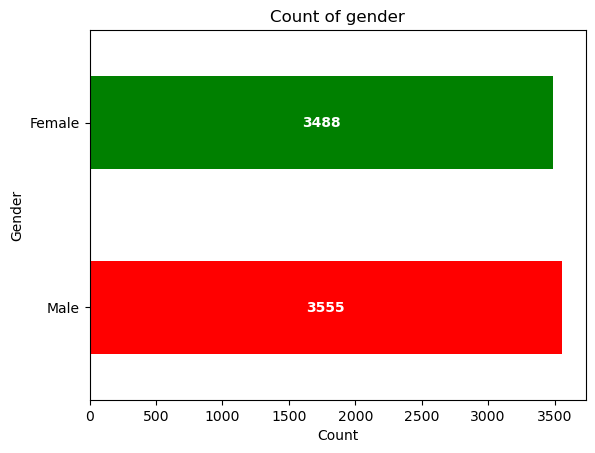

<Figure size 600x400 with 0 Axes>

In [16]:
# counts the number of occurrences of each gender in the 'gender' column of the 
gender_count = df_telco_cust['gender'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'green']

# This line creates the horizontal bar chart using the plot() function of the gender_count object
ax = gender_count.plot(kind='barh', color=colors)


# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(gender_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.figure(figsize=(6,4))

plt.show()

From the plot we see that Female and Male are almost equally distributed with a difference of only 67.

### Senior Citizens
- The code below creates a horizontal bar chart that displays the count of senior and non-senior citizens in a dataset. The code first uses the value_counts() function to count the number of occurrences of each value in the 'SeniorCitizen' column of the dataset. It then creates a list of colors to use in the bar chart and uses the plot() function of the citizen_count object to create a horizontal bar chart.

- The code then loops through the bars and annotates the actual count in the center of each bar using the text() function. - Finally, the code adds a label, title, and size to the chart before displaying it using plt.show().

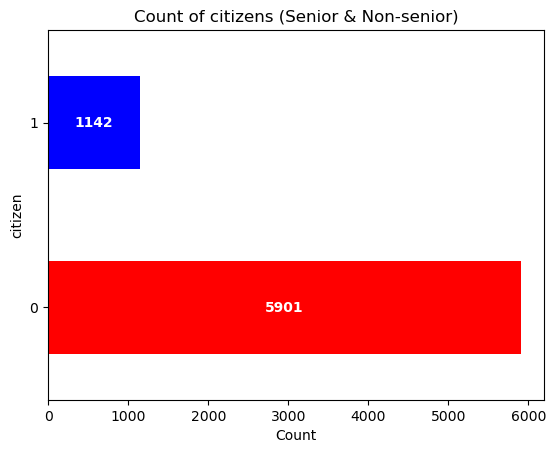

<Figure size 600x400 with 0 Axes>

In [17]:
# This code will plot a horizontal bar chart showing the count of senior and non-senior citizens 
citizen_count = df_telco_cust['SeniorCitizen'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'blue']

# This line creates the horizontal bar chart using the plot() function of the citizen_count object
ax = citizen_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(citizen_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')
    
# Adding label, title and size
plt.title('Count of citizens (Senior & Non-senior)')
plt.xlabel('Count')
plt.ylabel('citizen')
plt.figure(figsize=(6,4))

plt.show()

From the plot see that the ratio of Senior Citizens to Non-Senior Citizen is about 1:5. With Non-Seniors constituting about 84% of the whole distribution.

### Tenure
The code below creates a histogram plot for the 'tenure' variable from the 'df_telco_cust' dataframe using the Seaborn library in Python.

- The 'sns.histplot' function is used to create the histogram plot, with the 'df_telco_cust['tenure']' argument specifying the data to be plotted.

- The 'kde=True' argument adds a kernel density estimate plot to the histogram, providing a smoothed line that shows the distribution of values in the data.

- The 'color' argument is used to set the color of the histogram bars to red.

- Overall, the code is a simple and effective way to visually explore the distribution of values in the 'tenure' variable of the 'df_telco_cust' dataframe.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

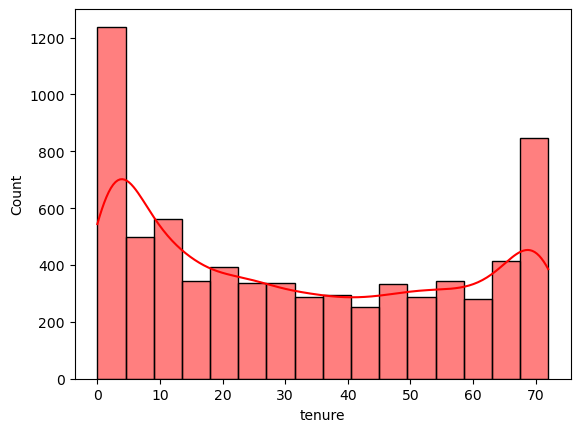

In [18]:
# creates a histogram plot using the Seaborn library in Python.
sns.histplot(df_telco_cust['tenure'], kde=True, color='red')

From the graph, we visualize that there is almost a uniform distribution of Tenure between 10 to 65 months at about 400 customers each and a peek of slightly above 1200 customers with a Tenure 0-5 months and a gain a peek of about 800 customers with a Tenure of 70 and above months.

### Streaming Movies
The code below generates a horizontal bar chart that displays the count of different streaming movies that customers have subscribed to.

1. The first line counts the number of occurrences of each value in the 'StreamingMovies' column of the DataFrame and stores the result in the S_movie_count variable.

2. The second line creates a list of three colors to be used in the horizontal bar chart.

3. The third line creates the horizontal bar chart using the plot() method of the S_movie_count object with the kind parameter set to 'barh' for horizontal bars, and the color parameter set to the list of colors.

4. The fourth line uses a for loop to annotate the actual count of each value in the center of its respective bar.

5. Finally, the code adds a title and labels for the x and y-axes, sets the size of the figure, and shows the plot using the show() function.

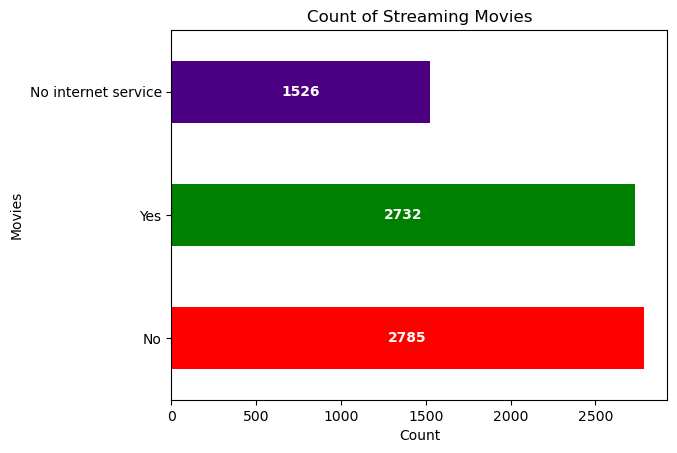

<Figure size 600x400 with 0 Axes>

In [19]:
# First, we obtain a count of the different values in the 'StreamingMovies' 
# column of a Pandas DataFrame named 'df_telco_cust'
S_movie_count = df_telco_cust['StreamingMovies'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green', 'indigo']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars,
# and the color parameter set to the list of colors we defined earlier
ax = S_movie_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(S_movie_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Streaming Movies')
plt.xlabel('Count')
plt.ylabel('Movies')
plt.figure(figsize=(6,4))

plt.show()

Customers who have streaming movies connections are 2732 and those without are 2785 (only a difference of 53 between the two) with those with no Internet being only 1526.

### MultipleLines
The code below is plotting a horizontal bar chart that shows the count of customers with multiple phone lines, categorized by the different types of multiple lines available to them.

1. First, the code creates a Pandas Series object called Multi_count that contains the count of each unique value in the 'MultipleLines' column of the 'df_telco_cust' DataFrame.

2. Next, a list of colors is defined to be used for the bars in the horizontal bar chart.

3. Then, the horizontal bar chart is created using the plot() method of the Multi_count object, with the kind parameter set to 'barh' for horizontal bars and the color parameter set to the list of colors previously defined.

4. After that, the code loops through each bar in the chart and annotates the actual count in the center of each bar using the text() method.

5. Finally, the code adds a title, xlabel and ylabel to the chart using the title(), xlabel() and ylabel() methods, respectively, and sets the figure size using the figure() method. The chart is then displayed using the show() method.

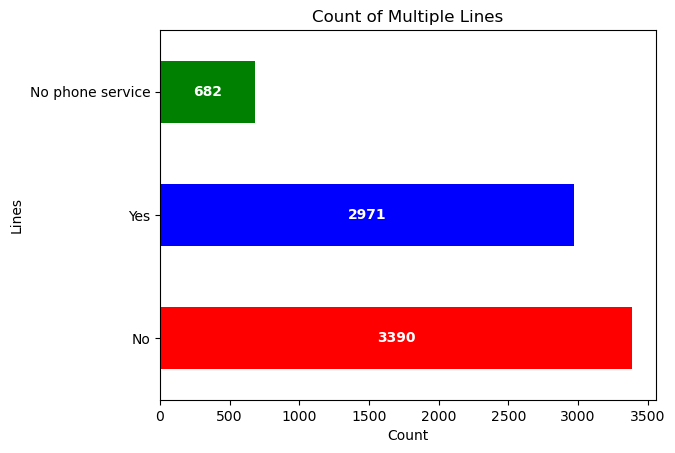

<Figure size 600x400 with 0 Axes>

In [20]:
# First, we obtain a count of the different values in the 'MultipleLines' 
# column of a Pandas DataFrame named 'df_telco_cust'
Multi_count = df_telco_cust['MultipleLines'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars,and the color parameter set to the list of colors we defined earlier
ax = Multi_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(Multi_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Multiple Lines')
plt.xlabel('Count')
plt.ylabel('Lines')
plt.figure(figsize=(6,4))

plt.show()

The bar graph shows the distribution of customers with or without Multiplelines as follows: No Multiple lines: 48%, With Multiplelines: 42% and  those with no phone services: 10%.

### Online Security
The code below createsa horizontal bar chart to display the count of different values in the 'OnlineSecurity' column of a Pandas DataFrame named 'df_telco_cust'.

1. The first line of the code counts the number of occurrences of each value in the 'OnlineSecurity' column of the 'df_telco_cust' DataFrame, and stores the result in the variable 'Security_count'.

2. Then, a list of colors for the bars in the horizontal bar chart is defined as 'colors'.

3. The horizontal bar chart is created using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars, and the color parameter set to the list of colors defined earlier. The resulting plot is stored in the variable 'ax'.

4. Next, a loop is used to iterate through each bar in the plot and annotate the actual count of each value in the center of each bar.

5. Finally, the plot is given a title, axis labels, and a size, and is displayed using the matplotlib.pyplot.show() function.

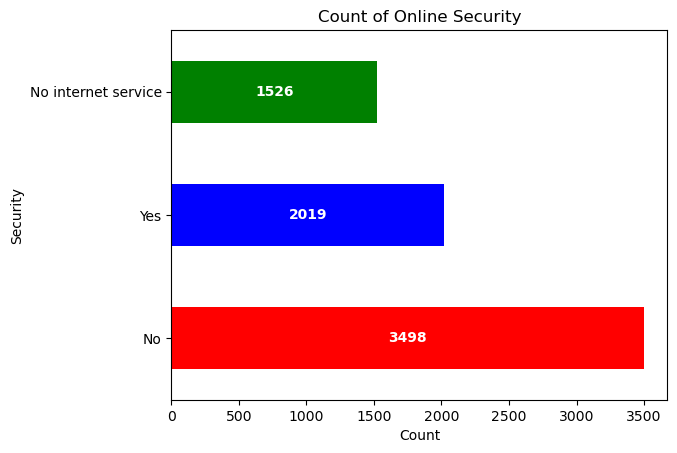

<Figure size 600x400 with 0 Axes>

In [21]:
# First, we obtain a count of the different values in the 'OnlineSecurity' 
# column of a Pandas DataFrame named 'df_telco_cust'
Security_count = df_telco_cust['OnlineSecurity'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter 
# set to 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = Security_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(Security_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Online Security')
plt.xlabel('Count')
plt.ylabel('Security')
plt.figure(figsize=(6,4))

plt.show()

The graph shows that customers without Online Security constitute around 50% followed by those with online security at 29% and the rest have no Internet service.

### Partner
The code below creates a horizontal bar chart to show the count of customers who have a partner and those who don't.

1. The first line of code gets the count of the different values in the 'Partner' column of the Pandas DataFrame 'df_telco_cust' using the value_counts() method.

2. Next, a list of colors for the bars in the horizontal bar chart is defined.

3. The horizontal bar chart is then created using the plot() method of the partner_count object with the parameters kind='barh' for horizontal bars and color=colors for the colors of the bars.

4. The for loop is used to loop through the bars and annotate the actual count in the center of each bar using the text() method of the ax object.

5. Finally, the code adds labels, title, and sets the figure size before displaying the chart using the show() method of the pyplot module in matplotlib.

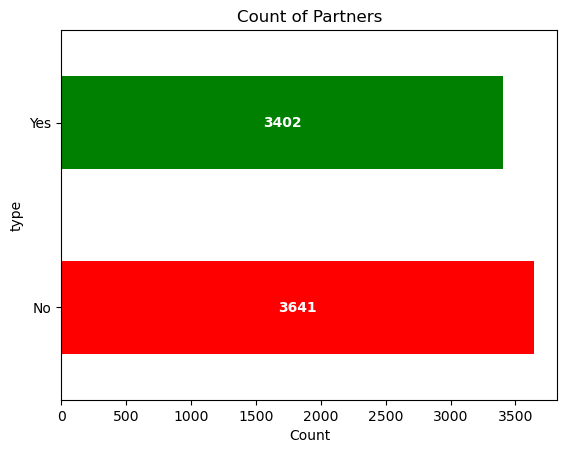

<Figure size 600x400 with 0 Axes>

In [22]:
# First, we obtain a count of the different values in the 'Partner' 
# column of a Pandas DataFrame named 'df_telco_cust'
partner_count = df_telco_cust['Partner'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = partner_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(partner_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Partners')
plt.xlabel('Count')
plt.ylabel('type')
plt.figure(figsize=(6,4))

plt.show()

Customers without partners make the majority at around 52% and those with parners at 48%.

# [8] Bivariate and Multivariate Analysis

## Bivariate Analysis
### Gender vs Churn
The code below creates a pivot table from a Pandas DataFrame df_telco_cust. The pivot_table() method is used to group and aggregate the data based on the provided parameters. The pivot table is created by specifying that the values to be aggregated are in the 'Contract' column, with the index being the 'gender' column, and the columns being the 'Churn' column. The aggregation function is set to 'count', which counts the number of occurrences of each unique combination of 'gender' and 'Churn'.

The resulting pivot table is printed using the print() function. It will display the counts of the 'Contract' column for each unique combination of 'gender' and 'Churn' in a tabular format.

In [23]:
# Create a pivot table of contracts counts by gender and churn
pivot_table = pd.pivot_table(df_telco_cust, values = ['Contract'], index=['gender'], columns=['Churn'], aggfunc='count')

# Print the pivot table
print(pivot_table)

       Contract     
Churn        No  Yes
gender              
Female     2549  939
Male       2625  930


## Visualization
The code below generates a stacked bar chart of the pivot table created in the previous code block.

1. pivot_table.plot(kind='bar', stacked=True) creates the bar chart with the stacked parameter set to True to stack the bars on top of each other.

2. plt.title('Count of Contract by gender and Churn') sets the chart title to "Count of Contract by gender and Churn". plt.xlabel('gender') sets the x-axis label to "gender", and plt.ylabel('Count') sets the y-axis label to "Count".

3. plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1)) adds a legend to the chart with the location set to 'upper right' and the bounding box anchor set to (1.2, 1), which means that the legend will be located outside the plot area to the right and above the chart.

4. plt.xticks(rotation=0) adjusts the rotation of the x-axis labels to be horizontal for better readability.

5. Finally, plt.show() displays the chart.

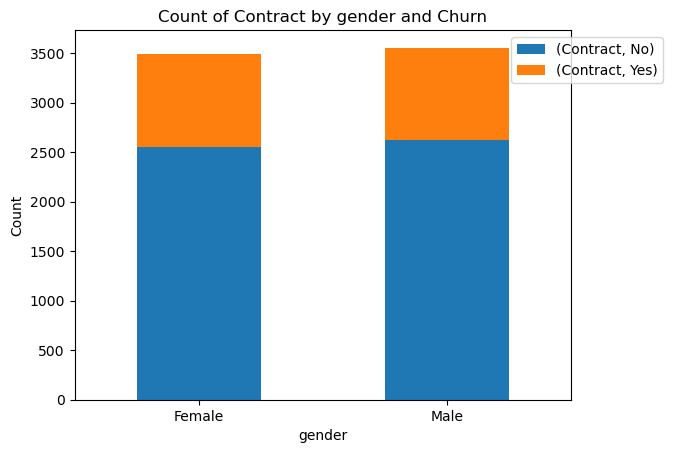

In [24]:
# We create a bar chart using a pivot table with the Pandas plot() method, with the kind parameter set to 
# 'bar' for vertical bars, and the stacked parameter set to True to stack the bars on top of each other
pivot_table.plot(kind='bar', stacked=True)

# Adding label, title and size
plt.title('Count of Contract by gender and Churn')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# We adjust the rotation of the x-axis labels to be horizontal for better readability
plt.xticks(rotation=0)
plt.show()

The stacked-bar chart shows that Female and Male are almost uniformly distributed considering those who churn and those who don't.

### SeniorCitizens vs Churn
The code below creates a bar plot using the Seaborn library. 
- It visualizes the relationship between the SeniorCitizen column and Churn column of a given Pandas DataFrame df_telco_cust. 
- The x parameter specifies the column to be plotted on the x-axis and the y parameter specifies the column to be plotted on the y-axis. 
- The hue parameter specifies the column to use to distinguish the different bars in the plot. In this case, the hue parameter is set to 'gender', which means that the bars are grouped by gender. 
- The resulting plot shows the count of churned and non-churned customers based on whether they are senior citizens or not, with bars distinguished by gender.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

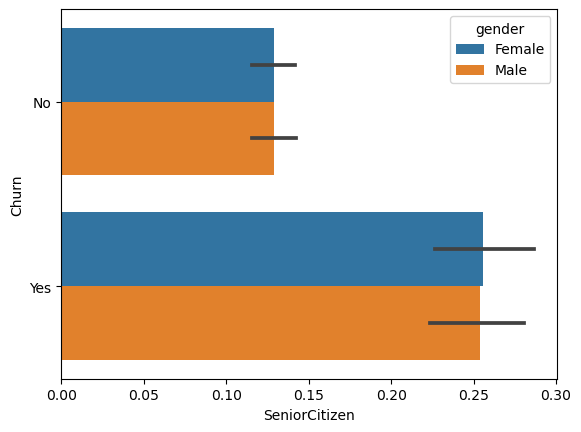

In [25]:
sns.barplot(data=df_telco_cust, x='SeniorCitizen', y='Churn', hue='gender')

The graph shows that many senior citizens churn and the distribution is uniform between male and female.

### Partner vs Churn
The code below creates a count plot with the x-axis being Partner and the hue (color) representing Churn. The plot will show the number of customers who churned and who didn't churn with and without a partner.

<AxesSubplot:xlabel='Partner', ylabel='count'>

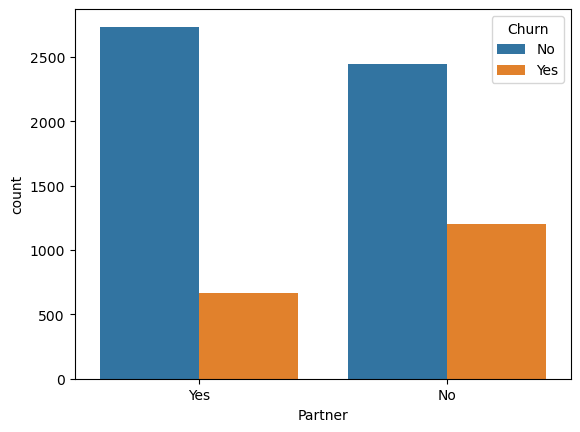

In [26]:
sns.countplot(data=df_telco_cust, x='Partner', hue='Churn')

Those without partners tend to churn more than those with partners.

### Dependent vs 
The code below creates a bar plot with the number of customers with and without Dependents, grouped by whether they have Churned or not. The countplot() function in seaborn counts the number of occurrences of each category and creates a bar plot of the counts.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

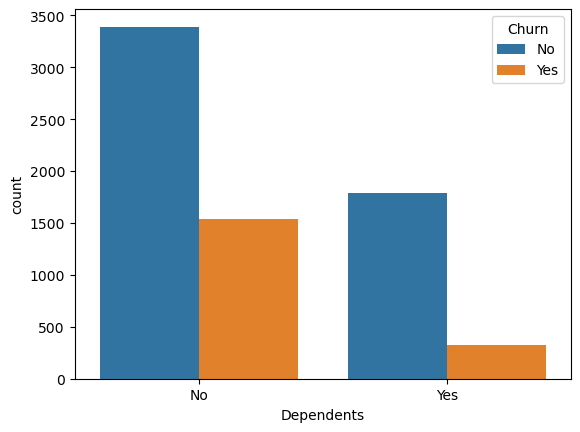

In [27]:
sns.countplot(x='Dependents', hue='Churn', data=df_telco_cust)

Those without dependents tend to churn more than those with dependents.

### MonthlyCharges vs Churn
- The code below creates a box plot using Seaborn library to visualize the relationship between the "MonthlyCharges" and "Churn" variables in the "df_telco_cust" dataset.

- The box plot is created using the boxplot() function in Seaborn, with "MonthlyCharges" as the x-axis and "Churn" as the y-axis. The data parameter specifies the DataFrame to use.

- After creating the box plot, the code sets the x-axis and y-axis labels using xlabel() and ylabel() functions, respectively. It also sets the title of the plot using title() function.

- Finally, the code displays the plot using show() function.

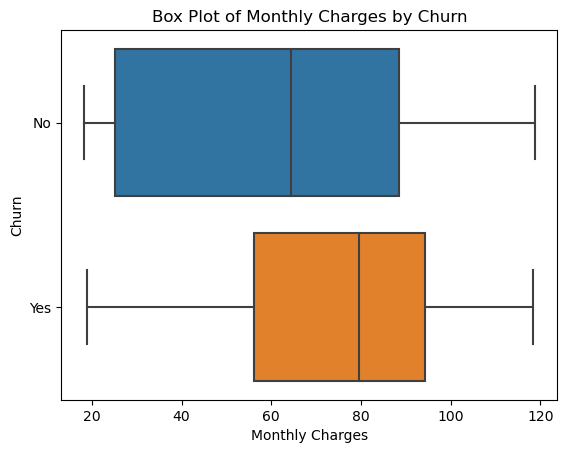

In [28]:
# create a box plot using boxplot() function
sns.boxplot(x="MonthlyCharges", y="Churn", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("Monthly Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Monthly Charges by Churn")

# display the plot
plt.show()

- By looking at the box plot, we can see that there are significant differences in the distribution of monthly charges for customers who churned compared to those who did not churn. 
    1. The median for those who don't churn is about 62 with 1st quartile of about 25 and 3rd quartile of about 90.
    2. The median for those who churn is about 80 with 1st quartile of about 55 and 3rd quartile of about 95.

### TotalCharges vs Churn
The code below creates a box plot to show the distribution of total charges for customers who have churned versus those who have not churned.

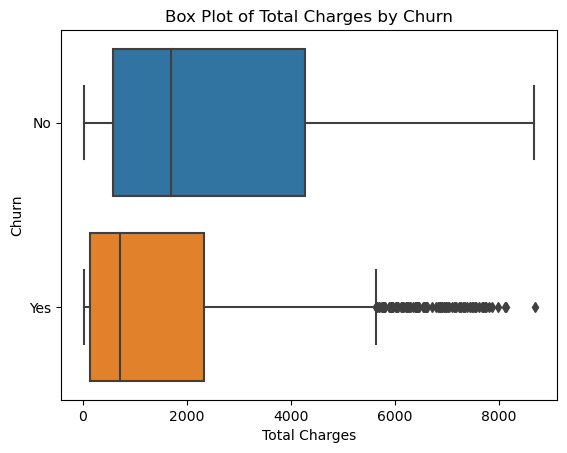

In [29]:
# create a box plot using boxplot() function
sns.boxplot(x="TotalCharges", y="Churn", data=df_telco_cust)

# set x-axis and y-axis labels and plot title
plt.xlabel("Total Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Total Charges by Churn")

# display the plot
plt.show()

Customers who tend to churn have their median Total Charges of about 500 but with several outliers beyond 5000.

### Internet Service vs Churn
The below creates a count plot showing the number of customers in each category of Internet Service (DSL, Fiber optic, or No) with the hue representing the Churn status (Yes or No).

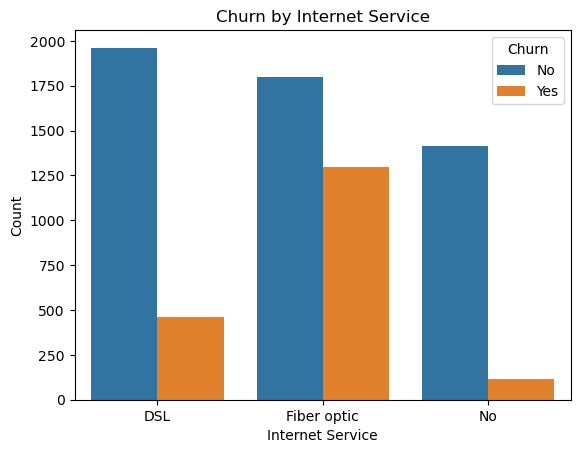

In [30]:
sns.countplot(data=df_telco_cust, x='InternetService', hue='Churn')
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Churn by Internet Service")
plt.show()

It appears that those who churn most are those with Fiber optic Internet Service.

### PaymentMethod vs Churn
The code below generates a stacked bar chart that shows the relationship between Payment Method and Churn in the telco customer dataset.

1. The code first creates a contingency table of PaymentMethod and Churn using the pd.crosstab() function. This table summarizes the number of customers who churned and did not churn for each payment method.

2. Then, the code sets the figure size using plt.figure(figsize=(16,14)) and creates a stacked bar plot of the contingency table using payment_churn_table.plot(kind='bar', stacked=True). The stacked bar plot shows the number of customers for each payment method, with the different colors representing the number of customers who churned and did not churn.

3. Finally, the code sets the plot title, axis labels, and rotates the x-axis labels for better visibility using plt.title(), plt.xlabel(), plt.ylabel(), and plt.xticks(rotation=15) functions respectively. The plot is then displayed using plt.show().

<Figure size 1600x1400 with 0 Axes>

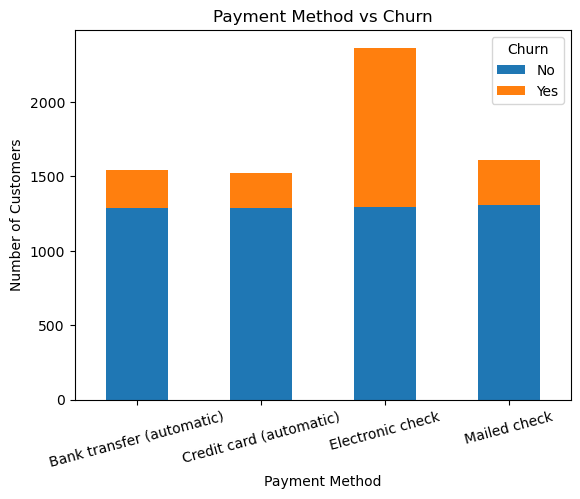

In [31]:
# create a contingency table of PaymentMethod and Churn
payment_churn_table = pd.crosstab(df_telco_cust['PaymentMethod'], df_telco_cust['Churn'])

plt.figure(figsize=(16,14))
# create a stacked bar plot
payment_churn_table.plot(kind='bar', stacked=True)

# set plot title and axis labels
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')

plt.xticks(rotation=15)

# display the plot
plt.show()

From the stack-bar chart it appears that those who churn most are those with Electronic check as a Payment Method.

## Multivariate Analysis

### Correletation of the Features in the dataset
The resulting heatmap shows the correlation coefficients between all pairs of variables in the dataset. Darker colors indicate stronger correlations (either positive or negative), while lighter colors indicate weaker or no correlations. The diagonal of the matrix (i.e., the correlation of each variable with itself) is always 1.

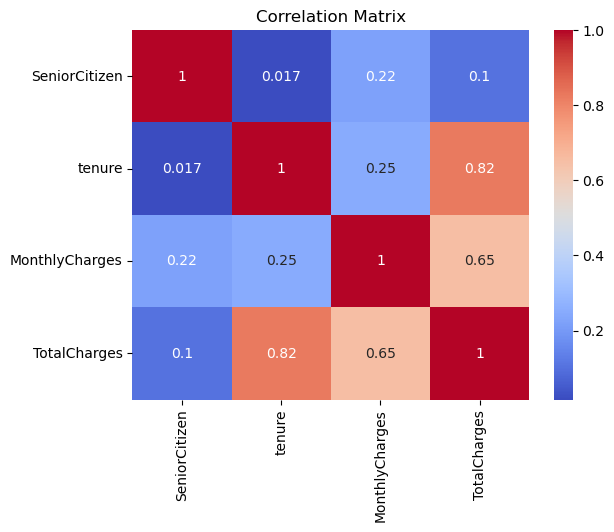

In [32]:
# compute the correlation matrix
corr_matrix = df_telco_cust.corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Correlation Matrix')

# show the plot
plt.show()

From the heatmap, we seen that there is very high correlation (0.82) between TotalCharges and tenure, also a fairly strong correlation of 0.65 between TotalCharges and MonthlyCharges.

### Scatter Matrix
- In the codebelow, we first select the columns that we want to include in the scatter plot matrix (in this case, tenure, MonthlyCharges, TotalCharges, and Churn). 
- We then create the scatter plot matrix using the pairplot() function from the Seaborn library. 
- The hue parameter is set to Churn so that the scatter plots are colored by the Churn variable. 
- The diag_kind parameter is set to 'hist' to show histograms on the diagonal instead of scatter plots. 
- Finally, we display the plot using plt.show().

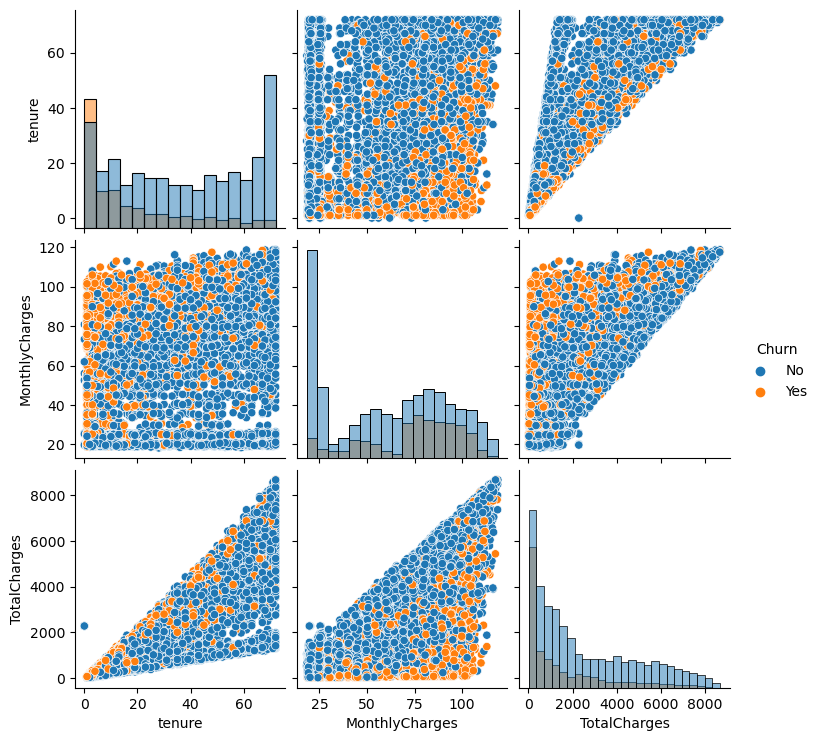

In [33]:
# select columns to include in the scatter plot matrix
cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# create scatter plot matrix using pairplot() function
sns.pairplot(df_telco_cust[cols], hue='Churn', diag_kind='hist')

# display the plot
plt.show()

From the Scatter Maatrix:
- Those with less than 40 months and MonthlyCharges above 80 tend to churn a lot.
- Those with MonthlyCharges in excess of 75 and TotalCharges below 4000 tend to churn more.
- And that tenure and TotalCharges have positive correlation

# [9] Questions and Hypotheses Testing

To further understand the Data we are going to ask and provide answers to the following questions and hypothesis

## Questions
1. <b>Does the type of internet service affect churn rate?<b>
2. <b>Are customers who have paperless billing more likely to churn?<b>
3. <b>Does the tenure of a customer affect churn rate?<b>
4. <b>Does having multiple lines affect churn rate?<b>
5. <b>Are customers on month to month contracts more likely to churn compared to customers on long term contracts<b>
    
## Hypothesis NO.1

H0: <b>The type of internet service does not affect churn rate<b>
    
H1: <b>customers Dsl or no internet service are more likely to churn compared to customers with fiber optic<b>

## Hypothesis NO.2

H0: <b>Paperless billing does not affect churn rate<b>
    
H1: <b>Customers with paperless billing are more likely to churn compared to customers who receive paper bill<b>

## Hypothesis NO.3
H0: <b>Tenure of a customer does not affect churn rate<b>
    
H1: <b>Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure<b>

### [Q1] Does the type of internet service affect churn rate?

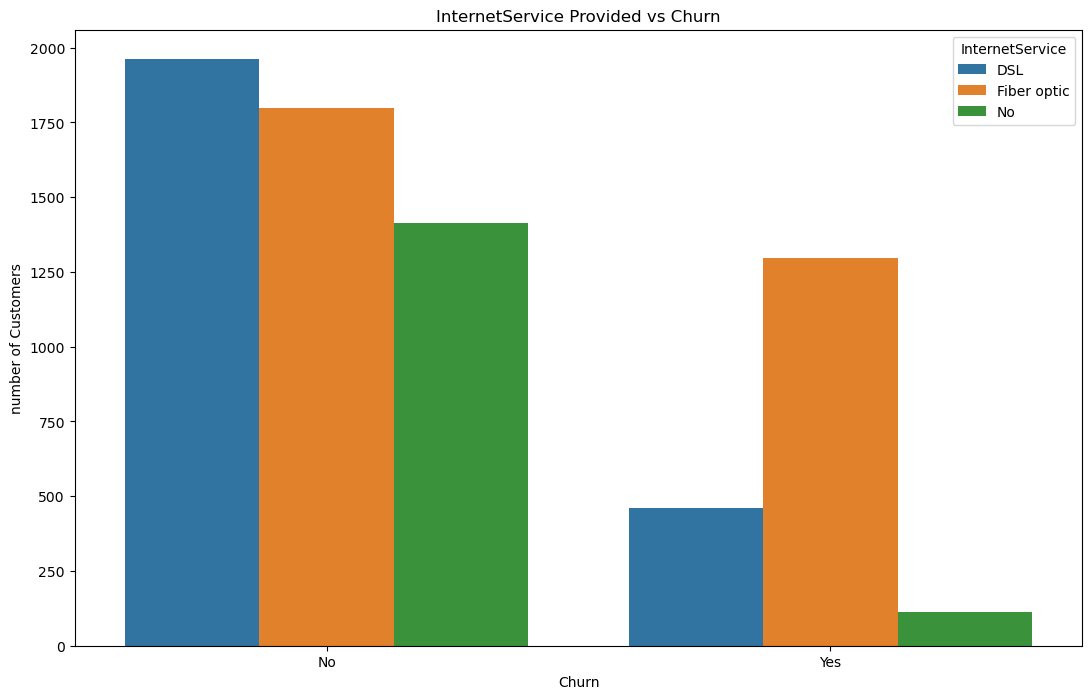

In [34]:
#Groupby the internet service type and churn

int_type=df_telco_cust.groupby(by=["InternetService","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(int_type["Churn"],int_type["count"],hue=int_type["InternetService"]);
plt.title("InternetService Provided vs Churn");
plt.ylabel("number of Customers");

- A lot of customers using the Fiber optic seems to leave the the company followed by DSL.
- As shown in the plot above further analysis will have to be made as to why, fiber users tend to leave the company the most

## [Q2] Are customers who have paperless billing more likely to churn?

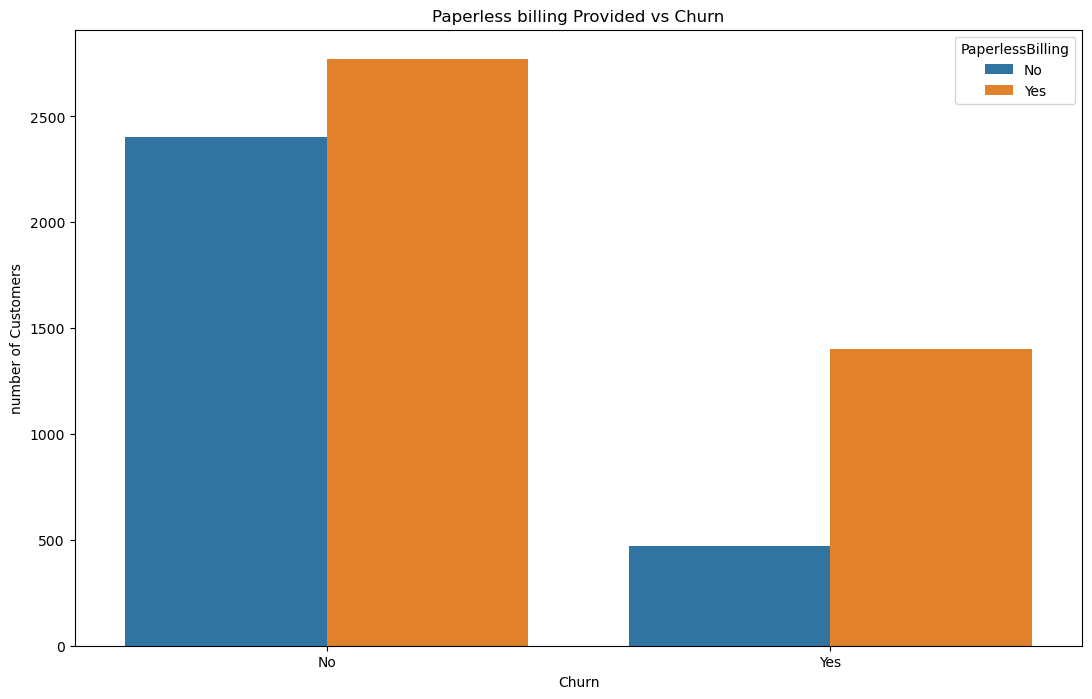

In [35]:
int_type=df_telco_cust.groupby(by=["PaperlessBilling","Churn"],as_index=False)["Churn"].value_counts(ascending=False)
plt.figure(figsize=(13,8))
sns.barplot("Churn","count",data=int_type,hue="PaperlessBilling");
plt.title("Paperless billing Provided vs Churn");
plt.ylabel("number of Customers");

Most people with paperless billing tend to churn however it looks like the main reason they churn is not the billing type as the number of people who churned is relatively small comapared to the type of internet service.

## [Q3]Does the tenure of a customer affect churn rate?

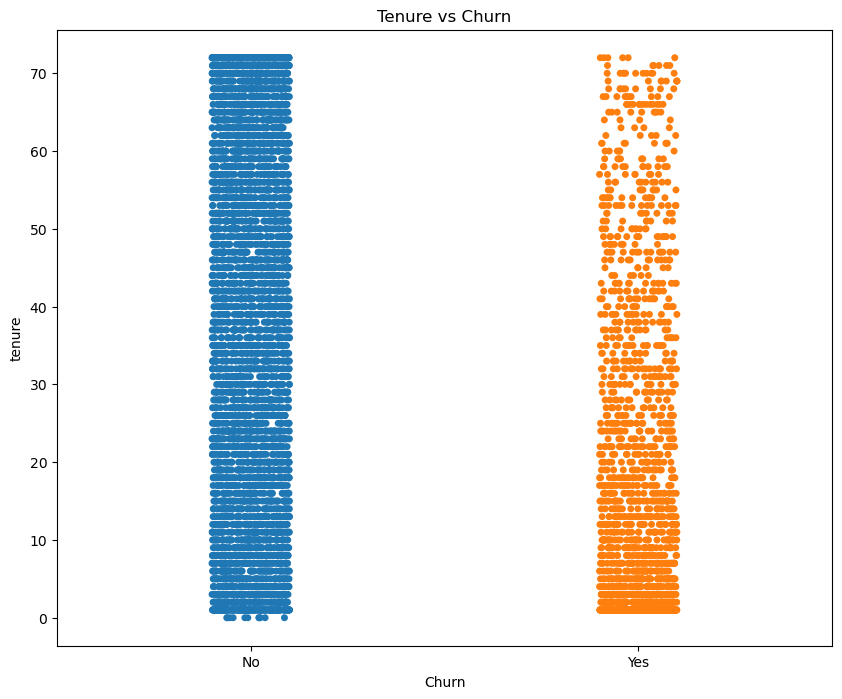

In [36]:
plt.figure(figsize=(10,8))
#make a stripplot
sns.stripplot(x="Churn",y="tenure",data=df_telco_cust);
plt.title("Tenure vs Churn");

- The stripplot above give a scatter view of the churn rate from the plot, people with higher tenure tend to stay. 
- People who just joined the company within 0 to 3 years tend to churn

## [Q4] Does having multiple lines affect churn rate?

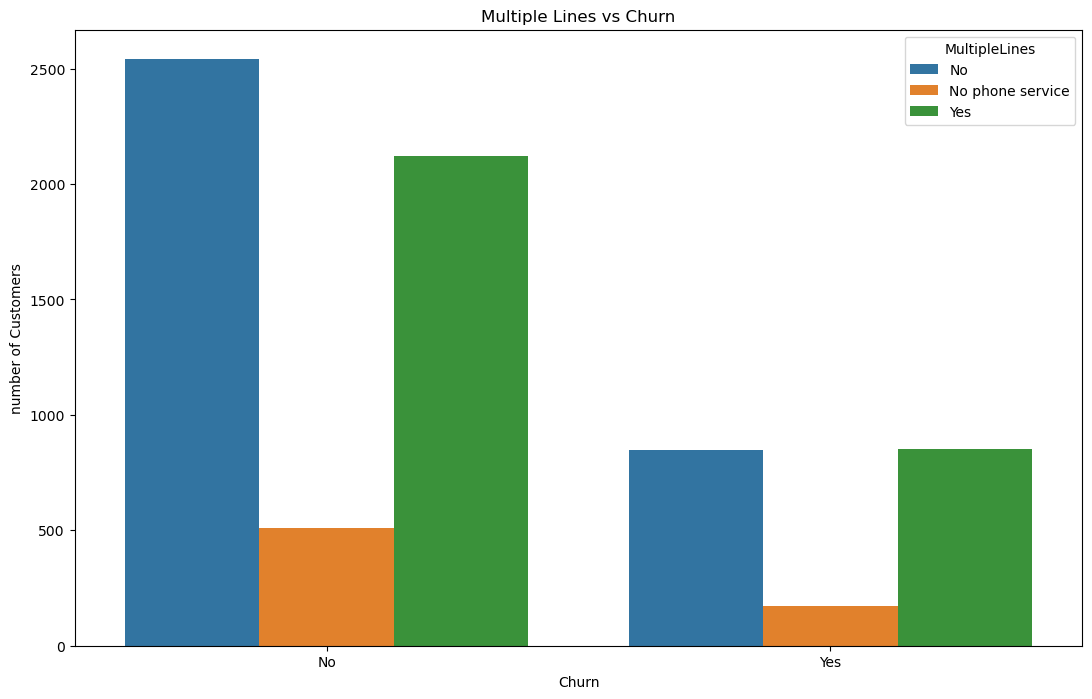

In [37]:
int_type=df_telco_cust.groupby(by=["MultipleLines","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(int_type["Churn"],int_type["count"],hue=int_type["MultipleLines"]);
plt.title("Multiple Lines vs Churn");
plt.ylabel("number of Customers");

### People with and without multiple lines tend to churn equally.

## [Q5] Are customers on month to month contracts more likely to churn compared to customers on long term contracts

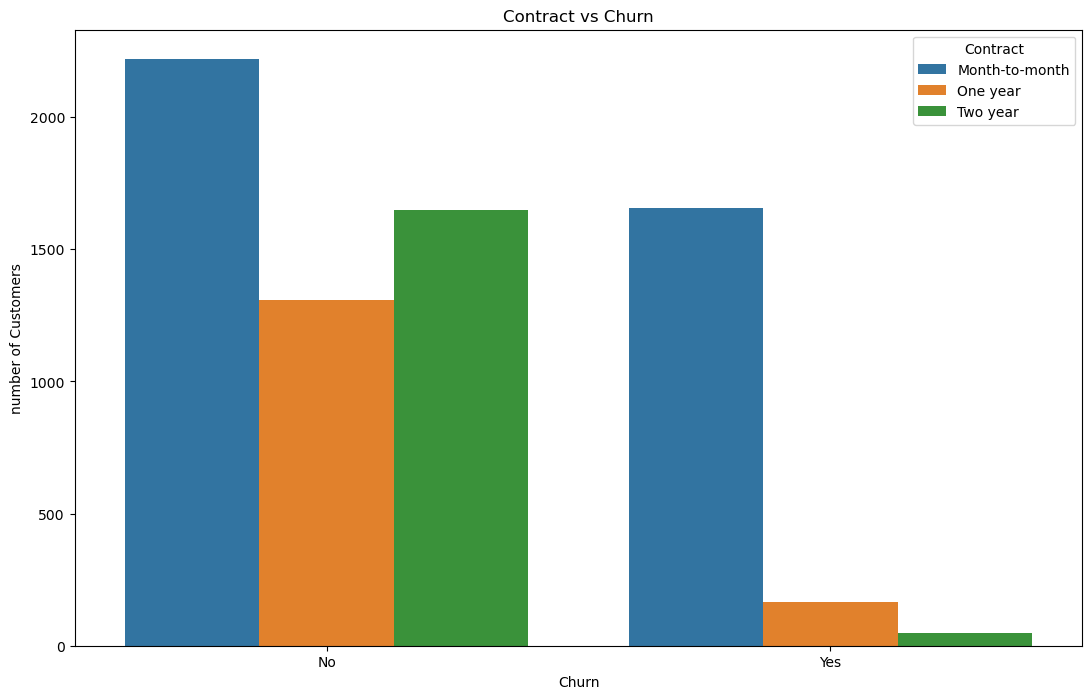

In [38]:
int_type=df_telco_cust.groupby(by=["Contract","Churn"],as_index=False)["Churn"].value_counts(ascending=False)

plt.figure(figsize=(13,8))
sns.barplot(int_type["Churn"],int_type["count"],hue=int_type["Contract"]);
plt.title("Contract vs Churn");
plt.ylabel("number of Customers");

- Most of the Customers who churn are on short term contracts.
- Overall most of the customers are on short term contracts and they also seem to churn the most.

## Insight:
From the insight gathered from the questions i.e
1. Most fiber optic customers tend to churn the most
2. People with shorter tenure (0 to 5 years) tend to churn the most
3. Customers on short term contracts(month to month) churn the most 

We will compare this 3 insights to really understand how they are connected.

## Hypotheses Testing [1]

H0: <b>The type of internet service does not affect churn rate<b>

H1: <b>customers with fiber optic  are more likely to churn compared to customers with Dsl or no internet service <b>

In [39]:
df_telco_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [40]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["InternetService","Churn"]]
#replace str values with numeric values i.e encode
hyp1["InternetService"].replace({"DSL":1,"Fiber optic":2,"No":3},inplace=True)

hyp1["Churn"].replace({"No":0,"Yes":1},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("InternetService") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
               sum_sq      df         F    PR(>F)
C(Churn)     8.573006     1.0  15.78232  0.000072
Residual  3824.693500  7041.0       NaN       NaN


- The Anova Test provides a P value of 0.000072

- Due to the small p value we reject our null hypothesis and accept the alternative hypothesis.

## Hypotheses Testing [2]

H0: <b>Paperless billing does not affect churn rate<b>

H1: <b>Customers with paperless billing are more likely to churn compared to customers who receive paper bill<b>

### Create a function that performs the hypothesis testing

In [41]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["PaperlessBilling","Churn"]]
#replace str values with numeric values i.e encode
hyp1["PaperlessBilling"].replace({"Yes":1,"No":2},inplace=True)

hyp1["Churn"].replace({"No":0,"Yes":1},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("PaperlessBilling") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
               sum_sq      df           F        PR(>F)
C(Churn)    62.586239     1.0  268.985218  2.356554e-59
Residual  1638.267375  7041.0         NaN           NaN


## F_stat and p_value
The code below computes the one-way ANOVA F-test between two variables PaperlessBilling and Churn in the hyp1 dataframe using the f_oneway() function from the scipy.stats module. 

The F-test is a statistical test that compares the variance between groups with the variance within groups to determine if there is a statistically significant difference in means between the groups. 

The function returns the F-statistic and the p-value. The F-statistic is a measure of the ratio of the variance between the groups to the variance within the groups, and the p-value is the probability of obtaining a test statistic as extreme as the one observed, assuming that the null hypothesis is true (i.e., there is no difference in means between the groups). The lower the p-value, the stronger the evidence against the null hypothesis.

In [42]:
f_stat, pvalue = stats.f_oneway(hyp1['PaperlessBilling'],hyp1['Churn'])

print('F_statistic: ',f_stat,'  ', 'p_value: ',pvalue)

F_statistic:  21057.74476923476    p_value:  0.0


With a p_value of 0.0, the above test shows that PaperlessBilling has an impact on churn

    - We therefore reject our null hypothesis

## Hypothesis Testing [3]
H0: <b>Tenure of a customer does not affect churn rate<b>

H1: <b>Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure<b>

## ANOVA Test

In [43]:
#Create a dataframe containing internet service and churn
hyp1=df_telco_cust[["tenure","Churn"]]


hyp1["Churn"].replace({"No":1,"Yes":2},inplace=True)

#Do an anova Test
print('ANOVA Output:')

model = ols('Q("tenure") ~ C(Churn)', data=hyp1).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

ANOVA Output:
                sum_sq      df          F         PR(>F)
C(Churn)  5.269675e+05     1.0  997.26801  7.999058e-205
Residual  3.720542e+06  7041.0        NaN            NaN


## The Chi-Square
The code below computes the chi-square statistic, p-value, degrees of freedom, and expected frequencies for the contingency table given in the hyp1 dataframe using the chi2_contingency function from the scipy.stats module.

- The chi2_contingency function takes a contingency table as input and returns the following outputs:

    1. chi2_stat: the computed chi-square statistic
    2. pvalue: the p-value associated with the chi-square statistic
    3. dof: the degrees of freedom
    4. exp: the expected frequencies based on the null hypothesis of no association between the variables.

The code then prints the chi-square statistic and p-value.

In [44]:
#from scipy.stats import chi2, chi2_contingency
chi2_stat, pvalue, dof, exp = chi2_contingency(hyp1)

print("Chi-Square Statistics: \n")

print(f"chi_stat: {chi2_stat}\nP-value: {pvalue}")

Chi-Square Statistics: 

chi_stat: 29471.995700214382
P-value: 0.0


#### Once again both the chi-square test and ANOVA test has proven that we can ignore the null hypothesis and take H1: Customers who have been with the company for a longer tenure are less likely to churn compared to customers with shorter tenure.

# [10] Building of Machine Learning Models

## Use copy of df_telco_cust for Machine Learning

In [45]:
df_telco_cust_ML = df_telco_cust.copy()

In [46]:
df_telco_cust_ML

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## See distribution of Target (Churn)

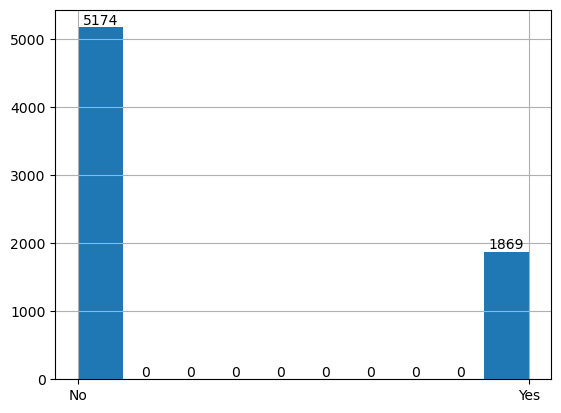

In [47]:
# Plot the histogram
ax = df_telco_cust_ML['Churn'].hist()

# Set the x-axis labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Display the values on top of each bar
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f"{height:.0f}", ha='center', va='bottom')
    
# Show the plot
plt.show()


### Guess the Accuracy of Churn

In [48]:
# Percentage of Attrition accuracy by guesswork
(5174/(1869+5174))*100

73.4630129206304

#### Just by guessing, we can assume that the accuracy of predicting Churn is 73.46%

### The customerID is unnecessary in building our model so we shall drop it

In [49]:
# Drop customerID from the dataset
df_telco_cust_ML.drop('customerID', axis=1, inplace=True)

# Verify that the 'customerID' column has been dropped
df_telco_cust_ML

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### See the dataset so far...

In [50]:
df_telco_cust_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [51]:
print(df_telco_cust_ML.nunique())

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# [11] Feature Encoding and Engineering

## Encode Churn to Boolean

In [52]:
df_telco_cust_ML.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

# Building the pipeline
The code below is preparing the data for a machine learning model using pipelines and transformers. Each line of the code is explained below:

1. categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']: This line defines the categorical features of the dataset that need to be preprocessed.

2. numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']: This line defines the numerical features of the dataset that need to be preprocessed.

3. This code creates a preprocessing pipeline for categorical data. The pipeline consists of two steps:
    - The first step is an imputer, which fills in any missing values in the categorical data using the most frequent value in each column. This is specified by setting the strategy parameter of the SimpleImputer class to 'most_frequent'.

    - The second step is a one-hot encoder, which converts the categorical features into binary vectors. The drop parameter of the OneHotEncoder class is set to 'first', which drops the first category of each feature to avoid multicollinearity. The sparse parameter is set to False to return a dense matrix instead of a sparse matrix.

4. numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]): This line defines a pipeline for preprocessing the numerical features. The pipeline first imputes missing values with the mean of the column and then scales the numerical data.

5. preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)]): This line defines a column transformer that applies the preprocessing pipelines to the numerical and categorical features separately.

6. pipeline = Pipeline(steps=[('preprocessor', preprocessor)]): This line defines the final pipeline that applies the preprocessing transformers to the data. It first applies the preprocessor defined in step 5 to transform the data, then applies the machine learning algorithm.

In [181]:
# Define which columns are categorical and which are numerical
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create the preprocessing pipelines for the categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse=False))])

# Create the preprocessing pipelines for the numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Combine the preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [116]:
df_telco_cust_ML

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Split the dataset into training and evaluation sets:

- The code below is splitting the data in df_telco_cust_ML into X and y components.

- X contains all the columns in df_telco_cust_ML except the Churn column which is the target variable.
- y contains only the Churn column.
- Then it uses train_test_split function from sklearn.model_selection module to split the X and y data into training and evaluation datasets.

- X_train and y_train contain 80% of the data and are used to train the machine learning model.
- X_eval and y_eval contain 20% of the data and are used to evaluate the performance of the trained model.

- The test_size argument specifies the proportion of the data to be used as the evaluation dataset, and random_state argument is used to initialize the internal random number generator, so that the split will be the same every time the code is run.

In [182]:
# Split data in to X and y components
X = df_telco_cust_ML.drop('Churn', axis=1)
y = df_telco_cust_ML['Churn']

# Split the data into 80% train, and 20% evaluation data
X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.2, random_state=42, stratify = y)

### The shapes of  train and  eval data after splitting

In [183]:
X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((5634, 19), (5634,), (1409, 19), (1409,))

## Fit the Pipeline into X_train


In [184]:
# Fit the pipeline on the training data
pipeline.fit(X_train)

# Transform the training and evaluation data using the pipeline
X_train_transformed = pipeline.transform(X_train)
X_eval_transformed = pipeline.transform(X_eval)

## Change the transformed X_train and X_eval to dataframes with the same column names


In [185]:
# Get the column names after preprocessing
num_feature_names = preprocessor.transformers_[0][2]
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features)

# Combine the numerical and categorical feature names
feature_names = list(num_feature_names) + list(cat_feature_names)

# Create dataframes for the transformed data with the original column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_eval_transformed_df = pd.DataFrame(X_eval_transformed, columns=feature_names)

### View the transformed X_train

In [186]:
X_train_transformed_df

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.102371,-0.521976,-0.263871,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.711743,0.337478,-0.505423,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.793155,-0.809013,-0.751850,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.263980,0.284384,-0.174271,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,-1.281624,-0.676279,-0.991514,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1.567778,1.470695,2.373424,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5630,-1.240918,-0.626504,-0.975794,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5631,-0.304686,1.256662,0.157035,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5632,-0.345392,-1.477661,-0.799076,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### View the transforemed X_eval

In [187]:
X_eval_transformed_df

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.608483,1.629976,2.707365,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,-0.996684,1.168725,-0.612126,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.346606,0.445324,0.398982,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,-0.589626,0.440347,-0.366139,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.608483,0.588013,1.588148,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.672252,0.738999,0.896841,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1405,-0.182569,-1.480980,-0.796814,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1406,-1.118801,-1.469365,-0.969998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1407,0.957192,-1.500890,-0.549180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### View y_train

In [188]:
y_train

3738    0
3151    0
4860    0
3867    0
3810    0
       ..
6303    0
6227    1
4673    1
2710    0
5639    0
Name: Churn, Length: 5634, dtype: int64

### View y_eval

In [189]:
y_eval

437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64

# [12] Machine Learning Models to train:
We shall train 8 Classification Models below and pick the 3 best performing models for further tuning:
1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree
4. Support Vector Machine (Linear Kernel)
5. Support Vector Machine (RBF Kernel)
6. Neural Network
7. Random Forest
8. Gradient Boosting

### We put the Models in a dictionary called models

### The code below works as follows:

1. The first part defines a dictionary called models which contains different types of classification models as its keys and their corresponding Scikit-learn estimator objects as its values.

2. A function called fit_and_score is then defined to train and evaluate all the models on the given dataset. 
    - The function takes five arguments: models which is a dictionary of different machine learning models, 
    - X_train_transformed_df which is the training data without the target label, 
    - X_eval_transformed_df which is the testing data without the target label, 
    - y_train which is the training label (i.e., Churn), and 
    - y_eval which is the test label (i.e., Churn).

3. Inside the function, a dictionary called model_scores is initialized to store the scores of each model after evaluation. 
    - The for loop iterates through each model in the models dictionary. 
    - For each model, it is fitted to the training data and then evaluated on the testing data. 
    - The score obtained from the evaluation is stored in the model_scores dictionary with the name of the model as the key.
4. Finally, the model_scores dictionary is returned.

In [190]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'K-Nearest Neighbors': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Support Vector Machine (Linear Kernel)': LinearSVC(),
         'Support Vector Machine (RBF Kernel)': SVC(),
         'Neural Network': MLPClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting':GradientBoostingClassifier()
         }

# Create a function to fit and score the models
def fit_and_score(models, X_train_transformed_df, X_eval_transformed_df, y_train, y_eval):
    '''
    We shall fit and evaluate all the 8 machine learning models.
    models: This is a dictionary of different machine learning models
    X_train_transformed_df: the training data without the target label
    X_eval_transformed_df: the testing data without the target label
    y_train: training label (ie. Churn)
    y_eval: test label (ie. Churn)
    
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores={}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train_transformed_df,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_eval_transformed_df,y_eval)
    return model_scores

## Calling the fit_and_score function:

### The code below does the following:

1. First, it calls the fit_and_score function and assigns the returned dictionary of model scores to model_scores.

2. Next, the code loops through the model_scores dictionary using the .items() method, which returns both the keys (model names) and values (scores) of the dictionary as a tuple in each iteration.

3. Inside the loop, the code uses the print() function to print the model name and its score in a formatted string.

4. The formatted string has two placeholders - {:>40} and {:>6.3%}.

    - :>40 means that the model name should be right-aligned with a width of 40 characters.
    - :>6.3% means that the score should be right-aligned with a width of 6 characters, with 3 decimal places and a "%" sign at the end.
5. So, the output of this code will print each model name and its score in a formatted string, where the model name is right-aligned and the score is also right-aligned and formatted as a percentage with 3 decimal places.

In [191]:
model_scores=fit_and_score(models = models, X_train_transformed_df = X_train_transformed_df,
                           X_eval_transformed_df = X_eval_transformed_df, y_train = y_train, y_eval = y_eval)

for model_name, score in model_scores.items():
    print("{:>40}: {:>6.3%}".format(model_name + ":", score))

                    Logistic Regression:: 80.483%
                    K-Nearest Neighbors:: 76.295%
                          Decision Tree:: 73.953%
 Support Vector Machine (Linear Kernel):: 80.057%
    Support Vector Machine (RBF Kernel):: 79.489%
                         Neural Network:: 78.495%
                          Random Forest:: 78.992%
                      Gradient Boosting:: 79.702%


- The accuracy scores above represent the performance of different machine learning algorithms applied to our dataset. Each score is the percentage of correct predictions made by the corresponding model on a test set of data.

- In this case, we can see that the Logistic Regression has the highest accuracy score of 80.483%, followed by Support Vector Machine (Linear Kernel) with 80.057%, Gradient Boosting with 79.702%. The Decision Tree algorithm has the lowest accuracy score of 74.095%.

## Visualize the Models performance

- The code below produces a horizontal bar plot with the accuracy values on the x-axis and the model names on the y-axis, sorted in descending order of accuracy. 
- The y-axis will be inverted to show the models with the highest accuracy at the top.

<Figure size 1000x600 with 0 Axes>

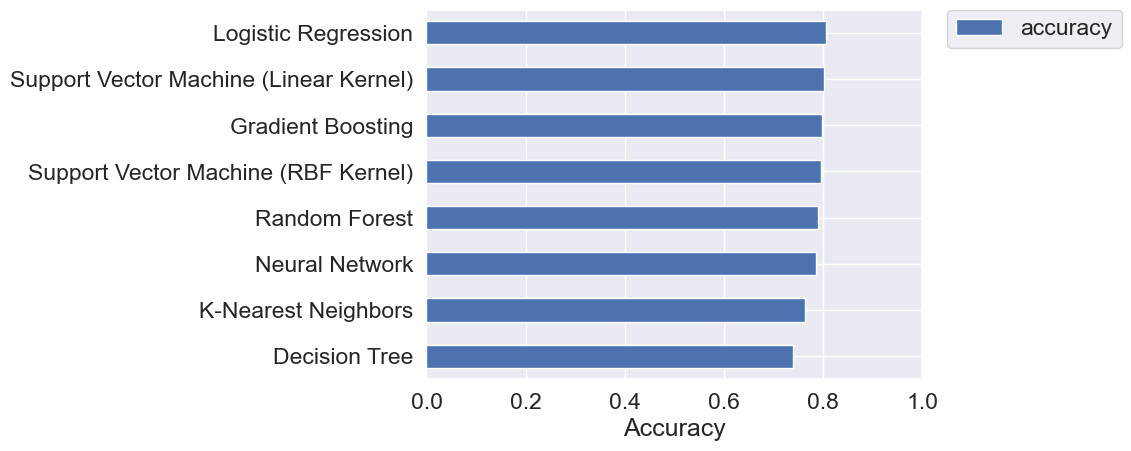

In [192]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare = model_compare.T.sort_values('accuracy', ascending=False) # sort by accuracy in descending order

plt.figure(figsize=(10,6))
ax = model_compare.plot.barh() # use barh method
ax.set_xlim([0, 1]) # set x-axis limit to range from 0 to 1
ax.set_xlabel('Accuracy') # set x-axis label
ax.invert_yaxis() # invert the y-axis to show highest accuracy at the top

# place the legend outside of the plot and to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Best 3 Performing Models
The 3 best perfoming models so far are Logistic Regression	with accuracy of 0.804826 followed by Support Vector Machine (Linear Kernel) with accuracy of 0.800568 and Gradient Boosting with accuracy of 0.797019.

In [193]:
model_compare.head(3)

,accuracy
Logistic Regression,0.804826
Support Vector Machine (Linear Kernel),0.800568
Gradient Boosting,0.797019


# [13] Hyperparameter tuning for our 3 best models Using Cross-validation:

1. Logistic Regression
2. Support Vector Machine (Linear Kernel)
3. Gradient Boosting

# Logistic Regression Hyperparameter Tuning:

#### The below code performs hyperparameter tuning for a logistic regression model using GridSearchCV.

   1. The param_grid dictionary defines the parameter grid for the logistic regression model. It specifies the values to be used for the penalty, C, solver, and max_iter hyperparameters.

   2. A logistic regression object is created using LogisticRegression().

   3. A GridSearchCV object is created by passing the logistic regression object and the parameter grid. The cv parameter specifies the number of folds to be used in the cross-validation.

   4. The fit() method is called on the GridSearchCV object to fit the model on the training data.

   5. The best parameters for the model are printed using grid_search_lr.best_params_.

In [129]:
# Define the parameter grid
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter': [100, 250, 500, 1000],
              'class_weight': [None, 'balanced']}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search_lr.fit(X_train_transformed_df, y_train)

# Print the best parameters
print("Best parameters: ", grid_search_lr.best_params_)

Best parameters:  {'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': 'none', 'solver': 'sag'}


### Getting the score using Best Parameters:
#### The below code is used to evaluate the performance of the best model obtained from hyperparameter tuning for logistic regression.

   1. First, the code obtains the best estimator object from the grid search object by using best_estimator_ method and assigns it to best_lr.

   2. Then, score() method is used to calculate the accuracy of the best model on the test data. score() method computes the mean accuracy on the given test data and labels, and returns it as a float value between 0 and 1, where 1 represents 100% accuracy. 
   3. The accuracy score is then printed using the print() function.

In [130]:
# Get the best model with best hyperparameters
best_lr = grid_search_lr.best_estimator_

# Evaluate the best model on the test data
test_score = best_lr.score(X_eval_transformed_df, y_eval)
print("Test score for Logistic Regression: ", test_score)

Test score for Logistic Regression:  0.8005677785663591


The score for logistic regression decreased slightly from 0.804826 to 0.8005677785663591 after hyperparameter tuning. This may be due to the fact that the hyperparameters chosen by the grid search did not lead to a significant improvement in the performance of the logistic regression model. It's also possible that the difference in scores is due to random chance or variance in the data.

# Support Vector Machine (Linear Kernel) Hyperparameter Tuning:
#### The code below is performing hyperparameter tuning for an SVM (Support Vector Machine) model with a linear kernel using the GridSearchCV method from Scikit-Learn.

1. First, a dictionary of hyperparameters with their respective values is defined in param_grid. In this case, the parameter C is varied between six different values, the kernel parameter is set to 'linear', and the gamma parameter is tested with two different options.

2. Then, an SVM object with a linear kernel is created and a GridSearchCV object is instantiated with this SVM object and the parameter grid defined earlier. The cv parameter is set to 5, indicating a 5-fold cross-validation.

3. Next, the GridSearchCV object is fitted on the training data (X_train_transformed_df and y_train), which means that the model will be trained and evaluated with different hyperparameter combinations using cross-validation.

4. Finally, the best parameters found during the GridSearchCV process are printed to the console.

In [131]:
# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear'],
              'gamma': ['scale', 'auto']}

# Create an SVM object with linear kernel
svm = SVC()

# Create a GridSearchCV object
grid_search_svm = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search_svm.fit(X_train_transformed_df, y_train)

# Print the best parameters
print("Best parameters: ", grid_search_svm.best_params_)

Best parameters:  {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


### Getting the score using Best Parameters:
#### The below code is used to evaluate the performance of the best model obtained from hyperparameter tuning for Support Vector Machine (Linear Kernel).

1. best_svm = grid_search_svm.best_estimator_ assigns the best estimator object (model with the best hyperparameters) obtained from the grid search for SVM to the variable best_svm.
2. test_score = best_svm.score(X_eval_transformed_df, y_eval) calculates the accuracy score of the best_svm model on the evaluation data X_eval_transformed_df and y_eval, and assigns it to the variable test_score.
3. Finally, the accuracy score on the test data is printed with the message "Test score for SVM: " using print("Test score for SVM: ", test_score)

In [132]:
# Get the best model with best hyperparameters
best_svm = grid_search_svm.best_estimator_

# Evaluate the best model on the test data
test_score = best_svm.score(X_eval_transformed_df, y_eval)
print("Test score for SVM: ", test_score)

Test score for SVM:  0.7970191625266146


The score for Support Vector Machine (Linear Kernel) decreased slightly after hyperparameter tuning. This may indicate that the original default hyperparameters were already performing well and that further tweaking did not significantly improve the model's performance. It is also possible that the chosen hyperparameters were not optimal for the specific dataset.

# Gradient Boosting Hyperparameter Tuning:
#### The code below is performing hyperparameter tuning for an Gradient Boosting Classifier model with using the GridSearchCV method from Scikit-Learn.
1. The param_grid dictionary specifies a range of values to search over for each hyperparameter of the model, including learning rate, number of estimators, and maximum depth.
2. A Gradient Boosting Classifier object is created.
3. A GridSearchCV object is created, using the Gradient Boosting Classifier and the parameter grid, along with a 5-fold cross-validation strategy (cv=5).
4. The GridSearchCV object is fit to the training data.
5. The best hyperparameters are printed out.

In [133]:
# Define the parameter grid
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
              'n_estimators': [50, 100, 250, 500],
              'max_depth': [2, 3, 4, 5]}

# Create a Gradient Boosting object
gb = GradientBoostingClassifier()

# Create a GridSearchCV object
grid_search_gb = GridSearchCV(gb, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search_gb.fit(X_train_transformed_df, y_train)

# Print the best parameters
print("Best parameters: ", grid_search_gb.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


### Getting the score using Best Parameters:

#### The code below retrieves the best model obtained from hyperparameter tuning using GridSearchCV for Gradient Boosting, and then evaluates its performance on the test set.

1. grid_search_gb.best_estimator_ returns the estimator that was chosen by GridSearchCV as the best model based on the given parameter grid and scoring metric. This best estimator is then assigned to best_gb.

2. Then, best_gb.score(X_eval_transformed_df, y_eval) calculates the accuracy of the best_gb estimator on the evaluation set (X_eval_transformed_df and y_eval). This accuracy is assigned to test_score. 
3. Finally, the code prints the test score for the Gradient Boosting model.

In [134]:
# Get the best model with the best hyperparameters:
best_gb = grid_search_gb.best_estimator_

# Evaluate the best model on the test data:
test_score = best_gb.score(X_eval_transformed_df, y_eval)
print("Test score for Gradient Boosting: ", test_score)

Test score for Gradient Boosting:  0.7977288857345636


The score for Gradient Boosting has improved only slightly after hyperparameter tuning. While hyperparameter tuning can improve the performance of a model, it is not a guarantee, and sometimes the improvement can be minimal. It is also possible that the original model was already performing close to its optimal level and there was not much room for improvement.

## Seeing the outcome of Logistic Regression once again:
The code below confirms the output accuracy of the trained LogisticRegression model on the evaluation set which we obtained earlier.

In [135]:
# Train the Logistic Regression model on the training set
lr = LogisticRegression()
lr.fit(X_train_transformed_df, y_train)

# Get the accuracy of the model on the evaluation set
accuracy = lr.score(X_eval_transformed_df, y_eval)

print("Accuracy of the Logistic Regression model: {:.4f}".format(accuracy))

Accuracy of the Logistic Regression model: 0.8048


We can then use the Logistic Regression model to predict the y_eval values by first fitting the model on the entire training dataset, which includes both X_train_transformed_df and y_train. 
- We do this by calling the fit() method on the Logistic Regression model as follows:

In [136]:
# Create a Logistic Regression model
lr = LogisticRegression()

# Fit the model on the entire training dataset
lr.fit(X_train_transformed_df, y_train)

LogisticRegression()

- Once we have fitted the model, we can then use it to predict the y_eval values using the predict() method as follows:

In [137]:
# Use the model to predict the y_eval values
y_pred = lr.predict(X_eval_transformed_df)

### We can then compare the results of y_pred with those of the original data y_eval as follows:

In [138]:
# Predicted values:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
# Original values
y_eval

437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64

# [14] Logistic Regression as the Chosen Model:
Based on the evaluation results, Logistic Regression and Support Vector Machine (Linear Kernel) models performed the best, with an accuracy of 80.483% and 80.057% respectively. The performance of these models is relatively similar, but the Logistic Regression model may be preferred due to its simplicity and interpretability. The K-Nearest Neighbors, Neural Network, Random Forest, and Gradient Boosting models performed relatively well, but had lower accuracy scores than the top two models. The Decision Tree model had the lowest accuracy score, indicating that it may not be the best choice for this particular problem. 

### Therefore, we can justify the choice of the Logistic Regression model for this project, given its high accuracy and interpretability.

# Evaluating our Chosen Machine Learning Model beyond Accuracy

## Apart from accuracy score, we shall also get the following from our chosen model:
- ROC curve and AUC score
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1-score

## (a) ROC curve and AUC score

The code below does the following:

1. y_prob = lr.predict_proba(X_eval_transformed_df)[:, 1]: This line generates predicted class probabilities using the logistic regression model lr for the evaluation data X_eval. We use the probability of the positive class (i.e., [:, 1]) to plot the ROC curve.

2. fpr, tpr, thresholds = roc_curve(y_eval, y_prob): This line calculates the False Positive Rate (FPR), True Positive Rate (TPR), and corresponding thresholds for a range of probability thresholds using the roc_curve() function from scikit-learn. The y_eval parameter is the actual binary class labels for the evaluation data and y_prob is the predicted probabilities of the positive class from step 1.

3. roc_auc = auc(fpr, tpr): This line calculates the Area Under the Curve (AUC) for the ROC curve using the auc() function from scikit-learn. The fpr and tpr parameters are the False Positive Rate and True Positive Rate values computed in step 2, respectively.

4. roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression'): This line creates an instance of the RocCurveDisplay class from scikit-learn, which is used to plot the ROC curve. The fpr, tpr, and roc_auc parameters are the values computed in step 2 and step 3, respectively. The estimator_name parameter is a string that specifies the name of the estimator that generated the ROC curve.

5. roc_display.plot(): This line plots the ROC curve using the plot() method of the RocCurveDisplay object created in step 4.

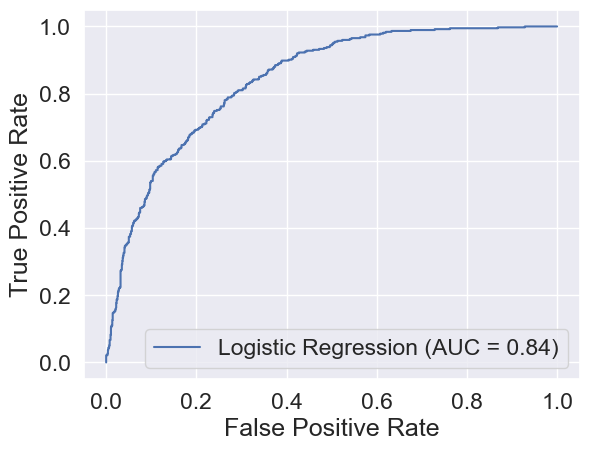

In [140]:
# Predict probabilities
y_prob = lr.predict_proba(X_eval_transformed_df)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_eval, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
roc_display.plot()

An AUC (Area Under the Curve) of 0.84 indicates that the logistic regression model has good discriminative power in distinguishing between the positive and negative classes. The AUC ranges from 0 to 1, with 0.5 indicating random guessing and 1 indicating perfect classification. An AUC of 0.84 is considered a good result in many classification problems, although the interpretation of what is considered a good AUC may depend on the specific context of the problem being addressed. Therefore, an AUC of 0.84 suggests that the logistic regression model has performed well in predicting the class labels of the evaluation set.

## (b) Confusion Matrix
- The code confusion_matrix(y_eval, y_pred) computes a confusion matrix which is a table that summarizes the performance of a classification algorithm on a set of test data. 
- The rows of the matrix represent the actual class labels while the columns represent the predicted class labels. 
- The matrix shows the number of true positives, false positives, false negatives and true negatives.

In [141]:
# Print the confusion matrix
print(confusion_matrix(y_eval, y_pred))

[[926 109]
 [166 208]]


The above result from the confusion matrix can be interpreted as follows:
- The resulting confusion matrix [[926 109], [166 208]] means that there are 926 true negatives (TN), 109 false positives (FP), 166 false negatives (FN), and 208 true positives (TP). This indicates that the model correctly predicted 926 negative cases and 208 positive cases. 
- However, the model misclassified 166 positive cases as negative (false negatives) and 109 negative cases as positive (false positives).

- It is important to look at the confusion matrix to evaluate the performance of the model because it provides more detailed information about the errors made by the model.

## Visualization of the Confusion Matrix

- The code below sets the font size for seaborn plots to 1.5 times the default size. 
- The function plot_conf_mat takes in the true labels y_eval and predicted labels y_pred, and plots a confusion matrix using seaborn's heatmap function. 
- The annot=True argument adds the numerical values of the confusion matrix to each cell, while cbar=False removes the color bar. 
- The fmt='d' argument specifies the format of the numerical values as integers. 
- Finally, the function sets the x-axis and y-axis labels and adjusts the bottom and top margins of the plot.

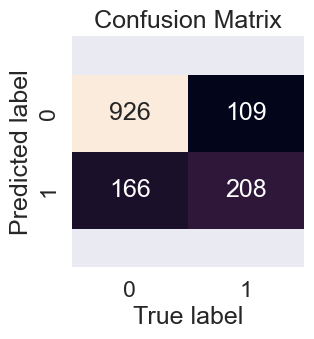

In [142]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_eval, y_pred):
    '''
    Plotting a good looking confusion matrix using seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_eval, y_pred), annot=True, cbar=False, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_eval, y_pred)

## Classification Report

- The classification_report function from scikit-learn's metrics module prints a text report showing the main classification metrics, such as precision, recall, f1-score and support, for each class in the target variable based on the predicted labels and the true labels. 

1. It is a useful tool to evaluate the performance of a classification model, especially when dealing with imbalanced classes.

2. The precision represents the proportion of true positives among the instances classified as positive, while the recall represents the proportion of true positives correctly identified by the model. 

3. The f1-score is a weighted average of precision and recall, and support represents the number of instances of each class in the true labels. 

By default, the classification_report function uses a threshold of 0.5 for binary classification problems to convert the model probabilities to binary predictions.

In [143]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



### Summary of our results:
The output is a classification report that summarizes the performance of our machine learning model in predicting the target variable. The report provides metrics such as precision, recall, and f1-score for each class (0 and 1) and for the overall performance of the model.

- For class 0, the precision score is 0.85, which means that out of all the samples the model predicted as class 0, 85% were correctly classified. The recall score is 0.89, which means that out of all the actual class 0 samples, 89% were correctly classified by the model. The f1-score is 0.87, which is the harmonic mean of precision and recall.

- For class 1, the precision score is 0.66, which means that out of all the samples the model predicted as class 1, 66% were correctly classified. The recall score is 0.56, which means that out of all the actual class 1 samples, 56% were correctly classified by the model. The f1-score is 0.60.

#### The accuracy of the model is 0.80, which means that 80% of the predictions made by the model were correct.

- The macro average of precision, recall, and f1-score is calculated as the unweighted mean of the scores for both classes. The weighted average of precision, recall, and f1-score is calculated as the weighted mean of the scores for both classes, with the weight being the support for each class.

- In our case, the macro-average precision, recall, and f1-score are 0.75, 0.73, and 0.74, respectively. The weighted average precision, recall, and f1-score are 0.80, 0.80, and 0.80, respectively. The support indicates the number of samples for each class in the evaluation set.

# [15] Calculation of Evaluation Metrics using Cross-validation:
- Here we shall calculate precision, recall and f1-score of our model using cross-validation by using "cross_validate()".

### First we check for best hyperparameters for our model (Logistic Regression)

### Because our best model was the default LogisticRegression(), we us its hyperparameters:
1. penalty='l2': specifies the norm used in the penalization
2. dual=False: selects the algorithm to solve the optimization problem. Dual optimization is only used when n_samples > n_features.
3. tol=0.0001: tolerance for stopping criteria.
4. C=1.0: inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.
5. fit_intercept=True: specifies whether a constant (a.k.a. bias or intercept) should be added to the decision function.
6. intercept_scaling=1: only used when fit_intercept is True. It scales the intercept along with the regularization term.
7. class_weight=None: assigns weights to classes. If not given, all classes are supposed to have weight one.
8. random_state=None: controls the pseudo-random number generation for shuffling the data.
9. solver='lbfgs': algorithm to use in the optimization problem. Other available options are 'newton-cg', 'sag', 'saga', and 'liblinear'.
10. max_iter=100: maximum number of iterations taken for the solver to converge.
11. multi_class='auto': specifies how to handle multi-class classification problems. Other options are 'ovr' and 'multinomial'.
12. verbose=0: verbosity mode.
13. warm_start=False: when set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
14. n_jobs=None: number of CPU cores used when parallelizing over classes. If None, it means 1 unless in a joblib.parallel_backend context.

- The code above defines the final pipeline for the machine learning model, which includes the preprocessor defined earlier and the classifier (in this case, Logistic Regression) defined as 'clf'.

- The next line calculates the metrics using cross-validation. Specifically, the cross_validate function from scikit-learn is used to evaluate the performance of the model. It takes the pipeline as input along with the feature matrix X and target vector y. The cv parameter specifies the number of cross-validation folds, which is set to 5 here.

- The scoring parameter is a list of metrics to be computed for each fold of the cross-validation. Here, the metrics included are accuracy, precision_macro, recall_macro, and f1_macro. These metrics provide a summary of the performance of the model, with each metric capturing a different aspect of the model's accuracy and reliability.
 
- Finally, the mean values of these metrics are printed.

In [168]:
# Create a logistic regression object
clf = LogisticRegression(C=1.0, max_iter=100, penalty='l2', solver='lbfgs', dual=False,
                      tol=0.0001, fit_intercept=True, intercept_scaling=1,
                      random_state=None, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)

# Define the final pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clf', clf)])

# Calculate the metrics using cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)

# Print the results
print('Accuracy:', cv_results['test_accuracy'].mean())
print('Precision:', cv_results['test_precision_macro'].mean())
print('Recall:', cv_results['test_recall_macro'].mean())
print('F1-Score:', cv_results['test_f1_macro'].mean())

Accuracy: 0.8036357184334474
Precision: 0.7504752768404813
Recall: 0.7228123598531694
F1-Score: 0.7339985831016247


**The results indicate that the logistic regression model is performing fairly well in predicting the churn outcome of customers.**
- The accuracy score of 0.80 means that the model is **correctly predicting the churn outcome for 80% of the customers** in the dataset. 
- The precision score of 0.75 indicates that out of all the predicted churn cases, **75% of them were actually churners.** 
- The recall score of 0.72 indicates that out of all the actual churn cases, **72% of them were correctly identified by the model.** 
- The F1-score of 0.73, which is the harmonic mean of precision and recall, is also a **good indicator of the model's performance.** 

**Overall, these scores suggest that the logistic regression model is a promising approach for predicting customer churn in this dataset.**

## Transform the metrics to a dataframe

In [169]:
metrics = {'accuracy': [0.8036357184334474],
           'precision': [0.7504752768404813],
           'recall': [0.7228123598531694],
           'f1-score': [0.7339985831016247]}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

   accuracy  precision    recall  f1-score
0  0.803636   0.750475  0.722812  0.733999


## Visualization of Cross-validated Metrics:
The code below helps use to visualize the performance our model using the cross-validated metrics.

- It creates a DataFrame cv_metrics with four columns: Accuracy, Precision, Recall, and F1, and one row with the cross-validated metric values. The DataFrame is then transposed (using .T) and plotted as a bar chart using plot.bar().

- The title parameter sets the title of the plot to "Cross-validated classification metrics", and legend=False removes the legend from the plot.

- The rot=0 parameter sets the rotation of the x-axis tick labels to 0 degrees, which means they will be horizontal.

- The ax.set_xlabel('') line sets the x-axis label to an empty string to remove the label.

- Finally, plt.show() displays the plot.

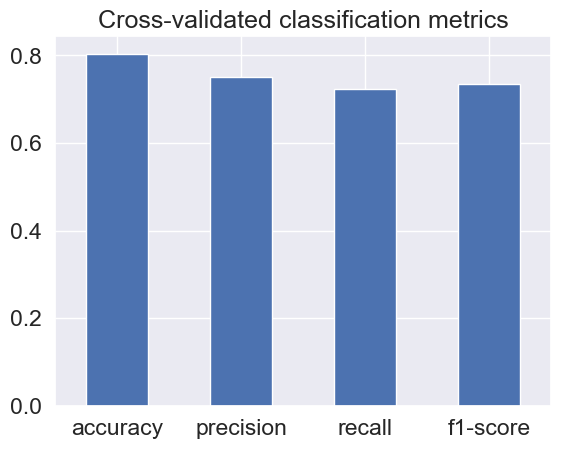

In [170]:
# Visualize cross-validated metrics

df_metrics.T.plot.bar(title = 'Cross-validated classification metrics', legend=False, rot=0)
ax.set_xlabel('')

plt.show()

# [16] Feature Importance:
- In machine learning, feature importance refers to a technique that assigns a score to each feature in a dataset based on its importance for predicting the target variable. 
- Feature importance can help identify which features have the most impact on the model's performance and can be used for feature selection, dimensionality reduction, and gaining insight into the underlying data.


There are several methods for calculating feature importance, such as permutation importance, mean decrease impurity, and coefficients in our model.
- In our case, we shall use coefficients.

### Importance Features in our Logistic Regression Model
We need to train our LogisticRegression classifier using the fit() method before the coefficients can be accessed via the coef_ attribute.

In [176]:
# Train our LogisticRegression classifier
clf = LogisticRegression()
clf.fit(X_train_transformed_df, y_train)

# Checking coefficients:
print(clf.coef_)

[[-1.22814864 -0.49435739  0.49912789  0.02186742  0.1457844   0.02072496
  -0.22696348 -0.113273    0.11356506  0.36782322  1.20813058 -0.17612806
  -0.17612806 -0.34308771 -0.17612806 -0.0931858  -0.17612806  0.0407906
  -0.17612806 -0.2933661  -0.17612806  0.38628214 -0.17612806  0.38763343
  -0.68796487 -1.33406327  0.37237898 -0.03326112  0.38365378  0.07329881]]


- The coef_ attribute in a logistic regression model represents the coefficients or weights assigned to each feature in the dataset. These coefficients can be greater than 1 or less than -1 when the corresponding feature has a high impact on the predicted outcome. In other words, features with larger coefficients have a stronger influence on the prediction of the model.

- In logistic regression, the coefficients represent the log-odds (logarithm of the odds ratio) of the probability of the outcome being positive (or 1) for a one-unit increase in the corresponding feature. Therefore, the magnitude of the coefficient represents the degree of impact that the corresponding feature has on the predicted probability.

In [177]:
# Match coef's of features to columns
feature_dict = dict(zip(df_telco_cust_ML.columns, list(clf.coef_[0])))
feature_dict

{'gender': -1.2281486437232494,
 'SeniorCitizen': -0.49435739382179267,
 'Partner': 0.49912788865878993,
 'Dependents': 0.021867418010483475,
 'tenure': 0.14578440445255114,
 'PhoneService': 0.020724963357710128,
 'MultipleLines': -0.22696348368162073,
 'InternetService': -0.11327299702027029,
 'OnlineSecurity': 0.11356505721519566,
 'OnlineBackup': 0.36782321566829956,
 'DeviceProtection': 1.2081305826850781,
 'TechSupport': -0.17612806287571098,
 'StreamingTV': -0.17612806287571098,
 'StreamingMovies': -0.3430877096542783,
 'Contract': -0.17612806287571098,
 'PaperlessBilling': -0.09318579783531722,
 'PaymentMethod': -0.17612806287571098,
 'MonthlyCharges': 0.04079059598535581,
 'TotalCharges': -0.17612806287571098,
 'Churn': -0.29336609974435557}

In [178]:
df_telco_cust_ML.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Visualize feature importance

<AxesSubplot:title={'center':'Feature Importance'}>

<Figure size 1800x2400 with 0 Axes>

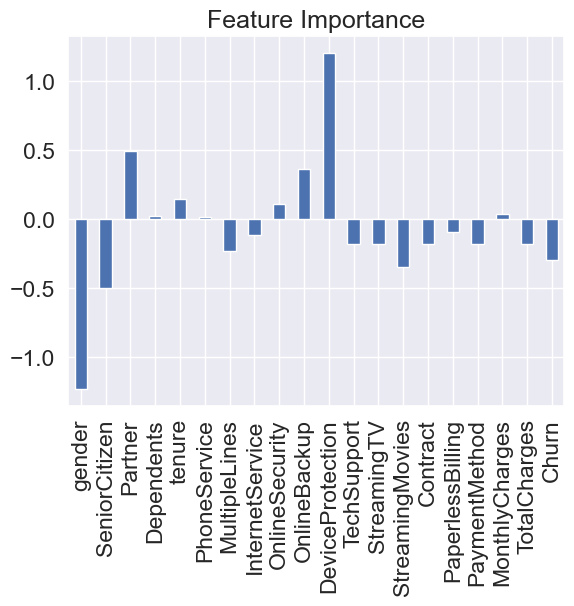

In [179]:
feature_df = pd.DataFrame(feature_dict, index=[0])
plt.figure(figsize=(18,24))
feature_df.T.plot.bar(title='Feature Importance', legend=False)

In [180]:
feature_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.228149,-0.494357,0.499128,0.021867,0.145784,0.020725,-0.226963,-0.113273,0.113565,0.367823,1.208131,-0.176128,-0.176128,-0.343088,-0.176128,-0.093186,-0.176128,0.040791,-0.176128,-0.293366


## Summary of Feature Importance:
Based on these results, we can see that the most important features in predicting customer churn are **DeviceProtection, tenure, OnlineBackup, and Partner.**
- Customers with DeviceProtection and OnlineBackup are more likely to stay with the company, while customers **with shorter tenure and no partner are more likely to leave.**

The other features have less of an impact on customer churn, with some even having a negative impact. For example, having **MultipleLines or using StreamingTV and StreamingMovies services** seem to slightly increase the likelihood of customer churn.

Since gender is a binary feature that takes two possible values (male or female), the negative sign of the coefficient suggests that *being male is associated with a lower likelihood of churn, compared to being female.* However, we should be cautious in interpreting this result since it is only one factor among many that may be contributing to churn. We should also consider other factors that may be correlated with gender, such as age, income, or usage patterns, and investigate their effects on churn.

# [17] Conclusion and Recommendation